In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score

In [2]:
df=pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [5]:
df.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

### Missing values

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Univariate Analysis

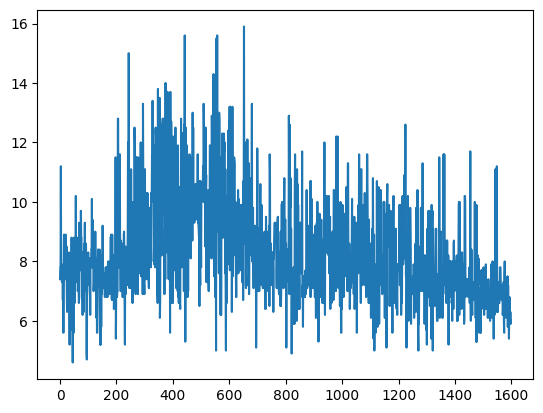

In [7]:
plt.plot(df['fixed acidity'])

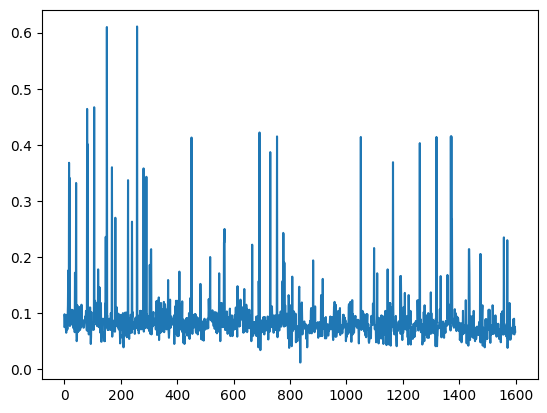

In [8]:
plt.plot(df['chlorides'])

### Bivariate Analysis

Text(0, 0.5, 'alcohol')

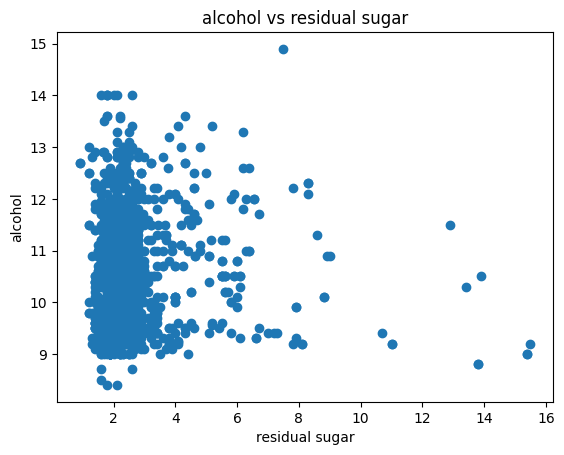

In [9]:
plt.plot(df['residual sugar'],df['alcohol'],'o')
plt.title('alcohol vs residual sugar')
plt.xlabel('residual sugar')
plt.ylabel('alcohol')

### Multvariate Analysis

In [10]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

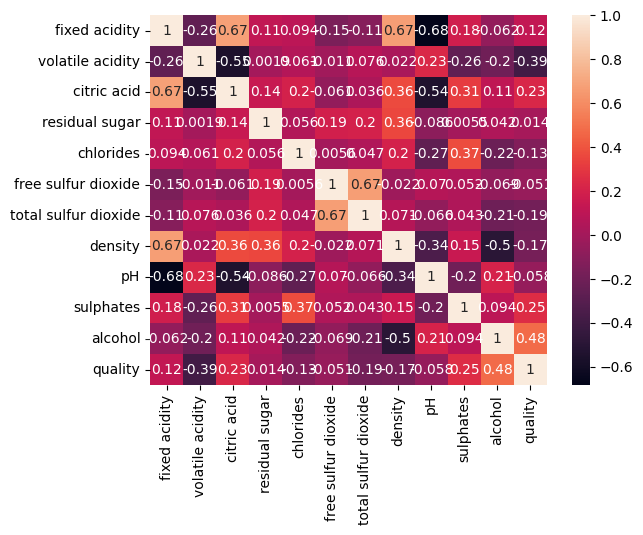

In [11]:
sns.heatmap(df.corr(),annot=True)

### Remove outliers

In [12]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [13]:
def remove_outliers_iqr(df, columns):
    cleaned_df = df.copy()
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    
    return cleaned_df

columns_to_clean = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
cleaned_df = remove_outliers_iqr(df, columns_to_clean)

In [14]:
df.shape

(1599, 12)

In [15]:
cleaned_df.shape

(1179, 12)

In [16]:
df=cleaned_df

In [17]:
df.shape

(1179, 12)

### Spliting the dataset

In [18]:
x=df.drop(columns='quality',axis=1)

In [19]:
y=df.quality

In [20]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [23]:
x.shape

(1179, 11)

### Scaling the dataset

In [44]:
scale=StandardScaler()

In [45]:
x=pd.DataFrame(scale.fit_transform(x),columns=x.columns)

In [46]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.522760,1.077803,-1.375744,-0.647508,-0.180706,-0.457421,-0.316839,0.763633,1.407839,-0.614084,-0.986764
1,-0.248346,2.174284,-1.375744,0.940570,1.356569,1.135446,0.947754,0.135771,-0.946440,0.419963,-0.571630
2,-0.248346,1.443297,-1.152735,0.259965,0.937312,-0.002316,0.449581,0.261343,-0.490773,0.161451,-0.571630
3,2.084173,-1.480652,1.746386,-0.647508,-0.250582,0.225236,0.679507,0.889206,-1.250217,-0.441743,-0.571630
4,-0.522760,1.077803,-1.375744,-0.647508,-0.180706,-0.457421,-0.316839,0.763633,1.407839,-0.614084,-0.986764


### Train Test Split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [51]:
x_train.shape

(943, 11)

In [52]:
x_test.shape

(236, 11)

### Linear Regression

In [53]:
lr=LinearRegression()

In [54]:
lr.fit(x_train,y_train)

LinearRegression()

In [121]:
y_pred_lr=lr.predict(x_test)

In [122]:
y_pred_train_lr=lr.predict(x_train)

In [123]:
r2_score(y_test,y_pred_lr)

0.3237061172132575

In [124]:
r2_score(y_train,y_pred_train_lr)

0.3869404258868202

### Logisitic Regression

In [126]:
Lr=LogisticRegression()

In [127]:
Lr.fit(x_train,y_train)

LogisticRegression()

In [128]:
y_pred_Lr=Lr.predict(x_test)

In [129]:
y_pred_train_Lr=Lr.predict(x_train)

In [130]:
accuracy_score(y_test,y_pred_Lr)

0.597457627118644

In [131]:
accuracy_score(y_train,y_pred_train_Lr)

0.6320254506892895

In [133]:
print(classification_report(y_test,y_pred_Lr))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         5
           5       0.71      0.62      0.66       106
           6       0.52      0.69      0.60        94
           7       0.56      0.32      0.41        31

    accuracy                           0.60       236
   macro avg       0.45      0.41      0.42       236
weighted avg       0.60      0.60      0.59       236



### Ridge

In [134]:
r=Ridge()

In [135]:
r.fit(x_train,y_train)

Ridge()

In [136]:
y_pred_r=r.predict(x_test)

In [137]:
y_pred_train_r=r.predict(x_train)

In [138]:
r2_score(y_test,y_pred_r)

0.32389300540647736

In [139]:
r2_score(y_train,y_pred_train_r)

0.38693975914611833

### Lasso

In [140]:
l=Lasso()

In [141]:
l.fit(x_train,y_train)

Lasso()

In [146]:
y_pred_l=l.predict(x_test)

In [147]:
y_pred_train_l=l.predict(x_train)

In [148]:
r2_score(y_test,y_pred_l)

-0.0007870627459591883

In [149]:
r2_score(y_train,y_pred_train_l)

0.0

### Decision Tree

In [112]:
model = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')

In [113]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [114]:
y_pred=model.predict(x_test)

In [115]:
y_pred_train=model.predict(x_train)

In [116]:
accuracy_score(y_test,y_pred)

0.6186440677966102

In [117]:
accuracy_score(y_pred_train,y_train)

0.6352067868504772

In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         5
           5       0.78      0.58      0.66       106
           6       0.53      0.77      0.63        94
           7       0.59      0.42      0.49        31

    accuracy                           0.62       236
   macro avg       0.48      0.44      0.44       236
weighted avg       0.64      0.62      0.61       236



C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest

In [151]:
model2 =RandomForestClassifier(criterion='entropy')

In [152]:
model2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [153]:
y_pred_rf=model2.predict(x_test)

In [154]:
y_pred_train_rf=model2.predict(x_train)

In [155]:
accuracy_score(y_test,y_pred_rf)

0.7203389830508474

In [156]:
accuracy_score(y_train,y_pred_train_rf)

1.0

In [158]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         5
           5       0.80      0.80      0.80       106
           6       0.65      0.77      0.71        94
           7       0.65      0.42      0.51        31

    accuracy                           0.72       236
   macro avg       0.53      0.50      0.50       236
weighted avg       0.71      0.72      0.71       236



C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
